In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
my_nc_file = '/Users/regin/Desktop/R/S2Scalibrationextremeheat/loadeR/2t_era5_Mar_1993_2016_format.nc'
data = Dataset(my_nc_file, mode='r')

In [3]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tass = data.variables['tas'][:]
data.close()
ens_mean = np.mean(tass, axis=(0))
print(ens_mean)

[[299.7681  299.63913 299.48172 ... 297.4645  297.51358 297.54852]
 [299.74722 299.6105  299.47305 ... 298.04916 298.1072  298.14096]
 [299.64963 299.60117 299.47333 ... 298.5282  298.5654  298.59506]
 ...
 [300.10617 300.10233 300.129   ... 299.6216  299.81912 300.09085]
 [300.08417 300.09412 300.08566 ... 300.34277 300.28897 300.26663]
 [300.0402  300.03372 300.0449  ... 300.43536 300.40353 300.34085]]


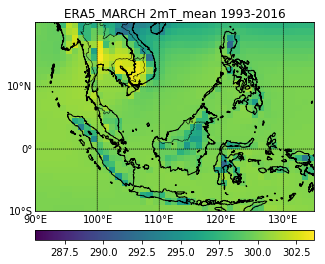

In [4]:
# Get some parameters for the Mercator Projection
#A cylindrical, conformal projection. Conformal projections preserve local shape.
#A map projection is conformal when at any point the scale is the same in every direction
lon_0 = lons.mean()
lat_0 = lats.mean()

#m = Basemap(width=5000000,height=3500000,
#            resolution='l',projection='stere',\
#            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(ens_mean))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('ERA5_MARCH 2mT_mean 1993-2016')

plt.show()